In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
df = pd.DataFrame(housing.data)
df.columns = housing.feature_names
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(housing.data, housing.target, random_state=50)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, random_state=50)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [8]:
np.random.seed(40)
tf.random.set_seed(40)

In [9]:
X_train.shape

(11610, 8)

In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss = "mean_squared_error", optimizer = keras.optimizers.SGD(lr = 1e-3), metrics = ["mae"])

C:\Users\salun\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
model_history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_valid, Y_valid))

Epoch 1/50
363/363 [==============================] - 1s 3ms/step - loss: 1.4209 - mae: 0.8254 - val_loss: 0.7822 - val_mae: 0.6593
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.7157 - mae: 0.6236 - val_loss: 0.6848 - val_mae: 0.6149
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6420 - mae: 0.5892 - val_loss: 0.6422 - val_mae: 0.5897
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6008 - mae: 0.5676 - val_loss: 0.6107 - val_mae: 0.5745
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5702 - mae: 0.5488 - val_loss: 0.5895 - val_mae: 0.5667
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5449 - mae: 0.5357 - val_loss: 0.5710 - val_mae: 0.5547
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5243 - mae: 0.5234 - val_loss: 0.5565 - val_mae: 0.5483
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [14]:
mae_test = model.evaluate(X_test, Y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4181 - mae: 0.4541


In [15]:
model_history.history

{'loss': [1.4208852052688599,
  0.7156656980514526,
  0.6420419216156006,
  0.6008450388908386,
  0.5701907277107239,
  0.5448587536811829,
  0.5243102312088013,
  0.505891740322113,
  0.4906001389026642,
  0.4776754081249237,
  0.46585240960121155,
  0.45562493801116943,
  0.44754496216773987,
  0.4388422966003418,
  0.43250343203544617,
  0.4264594614505768,
  0.42104655504226685,
  0.41587716341018677,
  0.4115132987499237,
  0.4084862172603607,
  0.40475428104400635,
  0.40117141604423523,
  0.39834895730018616,
  0.3954488933086395,
  0.39303866028785706,
  0.3905141055583954,
  0.38852041959762573,
  0.386456698179245,
  0.38457080721855164,
  0.3826547861099243,
  0.38094091415405273,
  0.3793729543685913,
  0.3776584565639496,
  0.37603506445884705,
  0.3744051158428192,
  0.3731934726238251,
  0.3716684877872467,
  0.3701811134815216,
  0.36861544847488403,
  0.36745744943618774,
  0.36587780714035034,
  0.3649073541164398,
  0.36329546570777893,
  0.36240869760513306,
  0.361

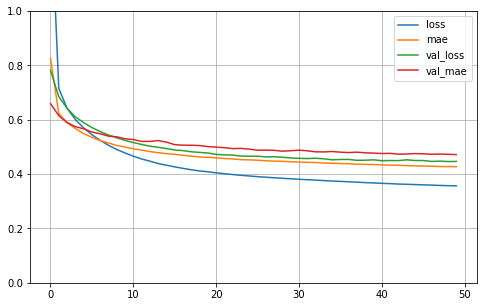

In [16]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [17]:
X_new = X_test[:3]

In [18]:
y_pred = model.predict(X_new)
print(y_pred)
print(Y_test[:3])

1/1 [==============================] - 0s 107ms/step
[[1.4724259]
 [3.0481858]
 [1.7869834]]
[1.963 2.75  1.275]
